In [109]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras import datasets,layers,models

In [110]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

In [111]:
X_train.shape

(50000, 32, 32, 3)

In [112]:
X_test.shape

(10000, 32, 32, 3)

In [113]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [114]:
categories=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [115]:
categories[6]

'frog'

In [116]:
categories[0]

'airplane'

In [117]:
def datas(X,y,index):
    plt.figure(figsize=(14,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

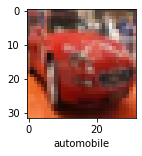

In [118]:
datas(X_train,y_train,5)

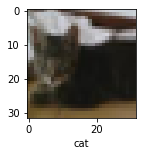

In [119]:
datas(X_train,y_train,9)

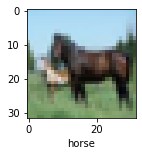

In [120]:
datas(X_train,y_train,12)

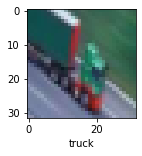

In [121]:
datas(X_train,y_train,50)

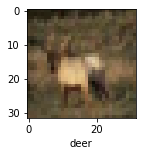

In [122]:
datas(X_train,y_train,3)

In [123]:
X_train=X_train/255
X_test=X_test/255

In [124]:
model1=models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='relu'),layers.Dense(10,activation='softmax')])
model1.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [125]:
model1.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 56s 35ms/step - loss: 1.9311 - accuracy: 0.3067
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6377 - accuracy: 0.4212
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5487 - accuracy: 0.4516
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4959 - accuracy: 0.4712
Epoch 5/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4377 - accuracy: 0.4914


In [126]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4426 - accuracy: 0.4848


[1.442643404006958, 0.4848000109195709]

In [127]:
y_pred=model1.predict(X_test)
y_pred_catogeries=[np.argmax(element) for element in y_pred]


print("Classification Report: \n",classification_report(y_test, y_pred_catogeries))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.62      0.58      1000
           1       0.60      0.62      0.61      1000
           2       0.47      0.15      0.22      1000
           3       0.35      0.33      0.34      1000
           4       0.38      0.51      0.43      1000
           5       0.42      0.38      0.40      1000
           6       0.56      0.45      0.50      1000
           7       0.48      0.59      0.53      1000
           8       0.68      0.53      0.59      1000
           9       0.46      0.67      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [128]:
model2=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),layers.MaxPooling2D((2,2)),layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Flatten(),layers.Dense(64,activation='relu'),layers.Dense(10,activation='softmax')])

In [129]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [130]:
model2.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6693 - accuracy: 0.3954
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0993 - accuracy: 0.6155
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9610 - accuracy: 0.6669
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8648 - accuracy: 0.7013
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8005 - accuracy: 0.7215
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7384 - accuracy: 0.7440
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6762 - accuracy: 0.7653
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6319 - accuracy: 0.7792
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.5987 - accuracy: 0.7905
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [131]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9484 - accuracy: 0.6967


[0.9483786225318909, 0.6966999769210815]

In [132]:
y_test=y_test.reshape(-1,)

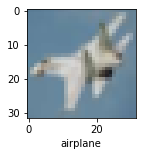

In [133]:
datas(X_test,y_test,10)

In [134]:
y_pred=model2.predict(X_test)
y_pred[:5]

array([[1.3114274e-05, 6.7655510e-06, 3.4998488e-04, 9.7589701e-01,
        1.4037189e-04, 2.0682864e-02, 1.6936024e-03, 6.0378238e-06,
        1.2019901e-03, 8.1003545e-06],
       [4.2637279e-03, 9.1155881e-01, 3.7429759e-06, 2.7598327e-07,
        1.2582508e-06, 2.7737897e-08, 1.9648577e-07, 2.6213883e-07,
        8.3947144e-02, 2.2464893e-04],
       [4.0515993e-02, 4.8464736e-01, 2.7947730e-04, 2.4050955e-02,
        3.5954895e-04, 1.7866864e-03, 3.3875001e-03, 2.1468983e-03,
        3.8227636e-01, 6.0549382e-02],
       [9.5263928e-01, 1.2159170e-04, 3.5546176e-02, 5.5708122e-03,
        2.7297579e-03, 2.1984828e-04, 3.5936627e-04, 2.7669457e-04,
        2.3522987e-03, 1.8421693e-04],
       [3.7174743e-08, 1.6809757e-07, 1.2071465e-01, 2.0645903e-02,
        1.7957368e-01, 1.2477372e-03, 6.7781651e-01, 5.7327657e-07,
        6.0868274e-07, 7.5349995e-08]], dtype=float32)

In [135]:
categories2=[np.argmax(element) for element in y_pred]
categories2[:5]

[3, 1, 1, 0, 6]

In [136]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

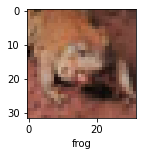

In [144]:
datas(X_test,y_test,5)

In [145]:
categories[categories2[5]]

'frog'

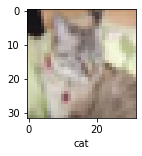

In [148]:
datas(X_test,y_test,8)

In [149]:
categories[categories2[8]]

'cat'

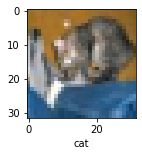

In [150]:
datas(X_test,y_test,0)

In [151]:
categories[categories2[0]]

'cat'